# Mathematical Walkthrough ✅

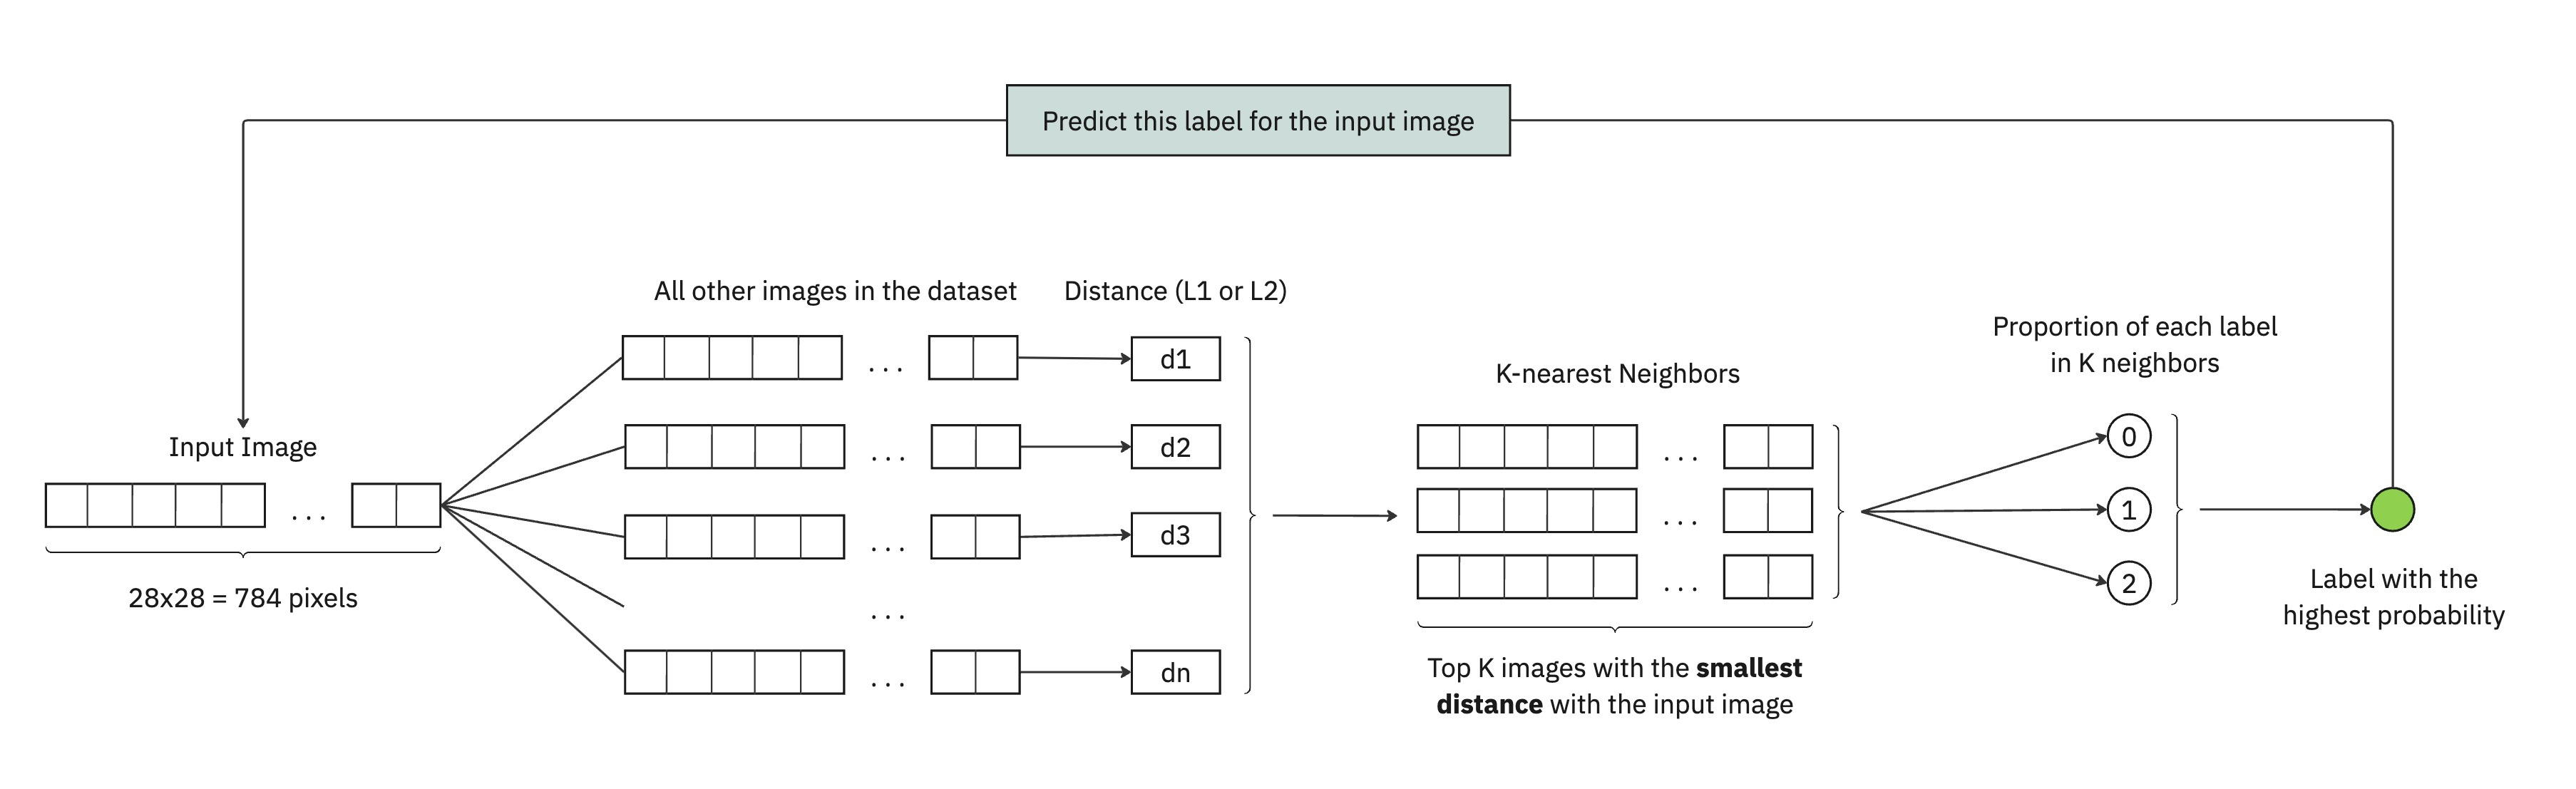

KNN is an **instance-based learning** model which is defined in terms of **similarity (measured in distance)** between a test input and each of the training inputs. KNN "memorizes" the training data to compare with the test set.

To classify a new letter, the model finds $K$ closest examples to that letter in the training set. Then, it looks at the labels of those examples to derive a distribution over the outputs for the local region around the input.

$$p(y = c|x, D) = \frac{1}{K} \sum_{n \in N_K(x,D)} \mathbb{I}(y_n = c)$$

- $D$ denotes the dataset of size $N$
- $p(y=c|x, D)$ is the probability of a label given the input features $x$ in the data set $D$
- $\mathbb{I}(y_n=c)$ is an indicator function that outputs 0 or 1 based on the condition in the paratheses.
- $\sum_{n \in N_K(x,D)} \mathbb{I}(y_n = c)$ involves finding the K closest examples from the dataset to the input $N_K(x,D)$, measured by a distance metric. For each neighbor, the function will check if it equals to $c$ - if true, it outputs 1 else outputs 0. Then, the function takes the sum over all the 0s and 1s.
- $\frac{1}{K}$ averages out sum by K - the size of neighborhood.

In this model, the distance metric $d(x, x')$ is measured in different ways:
  - Euclidean (L2 Norm): $d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$
  - Manhattan (L1 Norm): $d(x, y)=\sum_{i=1}^n|x_i-y_i|$
  - Chebyshev: $d(x,y)=\text{max}(|x_i-y_i|)$
  - Hamming: $d(x,y)=\sum_{i=1}^{n}(x_i \neq y_i)$
  - Cosine: $\text{cosine}(x, y)=\frac{x \cdot y}{||x|| \cdot ||y||}$

For example, if I want to classify an image to see if it belongs to a(0), ă(1), or â(2). The number of closest examples to the input is 5. Then, I compute the following probabilities:
$$p(y_i=0|x_i, D)= \frac{1}{5} \sum_{n \in N_K(x,D)} \mathbb{I}(y_n = 0)$$
$$p(y_i=1|x_i, D)= \frac{1}{5} \sum_{n \in N_K(x,D)} \mathbb{I}(y_n = 1)$$
$$p(y_i=2|x_i, D)= \frac{1}{5} \sum_{n \in N_K(x,D)} \mathbb{I}(y_n = 2)$$

In the first formula, the function computes the distances between the input image $i$ and all other images in the dataset. Then, it output the top $K$ examples with the smallest distances with $x$: $N_K(x,D)$. Next, it will loop over these K examples and check if each example's label is equal to 0 or not - if true, the indicator function will output 1 else it will output 0. Then, it will sum over 5 of those outputs and divide by the size $K$.

The same process is applied to the second and last formula. Lastly, the function will compare those 3 probabilities - the label associated with the highest one indicates that the input image belongs to that label.


### **1.1 Pseudocode**

**Algorithm 1.1. K-Nearest Neighbor Classifier**

---
1. $\textbf{procedure} \ \text{KNearestNeighborClassifier}(X_{train}, X_{test}, y_{train}, y_{test}, K, \text{distance_function})$
2. $\text{predictions} = []$
3. $\textbf{for} \ \text{each} \ x_{test} \ \text{in} \ X_{test} \ \textbf{do}$
4. $\ \ \ \ \ \ \ \ \text{distances} = []$
5. $\ \ \ \ \ \ \ \ \textbf{for} \ i = 1 \ \text{to} \ \text{length}(X_{train}) \ \textbf{do}$
6. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{dist} = \text{distance_function}(x_{test}, X_{train}[i])$
7. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{distances.append}((\text{dist}, y_{train}[i]))$


8. $\ \ \ \ \ \ \ \ \text{nearest_neighbors} = \text{sort(distances)}[:K]$


9. $\ \ \ \ \ \ \ \ \text{class_votes} = \{\}$
10. $\ \ \ \ \ \ \ \ \textbf{for} (\_, \text{label}) \ \text{in} \ \text{nearest_neighbors} \ \textbf{do}$
11. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{class_votes}[\text{label}] = \text{class_votes.get(label, 0)} + 1$
12. $\ \ \ \ \ \ \ \ \text{prediction = max(class_votes, key=class_votes.get)}$


13. $\ \ \ \ \ \ \ \ \textbf{if} \ \text{list(class_votes.values()).count(class_votes[prediction]) > 1} \ \textbf{then}$
14. $ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \text{prediction} = \text{min(class_votes, key=lambda x: nearest_neighbors[class_votes[x]} - 1][0])$
15. $\ \ \ \ \ \ \ \ \text{predictions.append(predictions)}$
16. $\textbf{return} \ \text{predictions}$




### **1.2. Optimization**
Optimizing KNN is about choosing the **K-value and distance metric**. Therefore, we will use **combinatorial approach** to search for the best combination of K and d.
- $K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]$
- $D$ includes 5 different types of distance metric:
  - Euclidean: $d(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$
  - Manhattan (L1 Norm): $d(x, y)=\sum_{i=1}^n|x_i-y_i|$
  - Chebyshev: $d(x,y)=\text{max}(|x_i-y_i|)$
  - Hamming: $d(x,y)=\sum_{i=1}^{n}(x_i \neq y_i)$

As a result, the model needs to try out **20 combinations** of K and d. Then we will compare the results to see which combination works best in this case.

**Algorithm 1.2. Optimization for KNN**

---
1. $\textbf{procedure} \ \text{GridSearchCV}(X_{train}, y_{train}, \text{k_values}, \text{n_splits})$
2. $\textbf{initialize} \ D = \{\\
    "Euclidean": \sqrt{(X_{test}-X_{train})^2}\\
    "Manhattan": |X_{test}-X_{train}|\\
    "Chebyshev": \max(|X_{test}-X_{train}|)\\
    "Hamming": \text{count}(X_{test} \neq X_{train})\\
    \\
  \}$
3. $\text{all_metrics} = \{\}$

4. $\textbf{for} \ \text{fold} \ \text{in} \ \text{cross_validation_split}(X, Y, \text{n_splits}) \ \textbf{do}$
5. $\ \ \ \ \ \ \ \ X_{train}, X_{val}, y_{train}, y_{val} = \text{fold}$
6. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \textbf{for} \ k \ \text{in} \ \text{k_values} \ \textbf{do}$
7. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \textbf{for} \ d \ \text{in} \ D \ \textbf{do}$
8. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{distance_func} = \text{D[d]}$
9. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{predictions}=\text{KNearestNeighborClassifier}(X_{train}, y_{train}, k, \text{distance_func})$
10. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{accuracy, precision, recall, F1}=\text{calculate_metrics}(\text{predictions}, y_{val})$
11. $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{all_metrics}[(k, d)]=(\text{accuracy, precision, recall, f1})$


12. $\text{average_metrics} = \{\}$
13. $\textbf{for} \ \text{key, values} \ \text{in} \ \text{all_metrics.items()} \ \textbf{do}$
14. $\ \ \ \ \ \ \ \ \text{average_metrics}[\text{key]}=\text{average all values of (k, d)}$
15. $\text{best_model} = \text{max}(\text{average_metrics, key=lambda x: averaged_metrics[x][3]})$
16. $\textbf{return} \ \text{average_metrics}, \ \text{best_model}$

# Model Training



## Import Libraries

In [3]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
# File reading
import os
from google.colab import drive
from typing import List
from google.colab.patches import cv2_imshow

In [5]:
# Import built-in libraries
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Loading

In [10]:
# Load Training Sets
fs_train_010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_010.csv")
fs_train_028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_028.csv")
fs_train_064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_064.csv")
fs_train_110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_110.csv")
fs_train_128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_128.csv")
fs_train_164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_164.csv")

In [11]:
# Load Test Sets
fs_test_010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_010.csv")
fs_test_028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_028.csv")
fs_test_064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_064.csv")
fs_test_110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_110.csv")
fs_test_128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_128.csv")
fs_test_164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_164.csv")

### Train Sets

In [12]:
X_train_010 = fs_train_010.drop('label', axis=1).values
y_train_010 = fs_train_010['label'].values

In [13]:
X_train_028 = fs_train_028.drop('label', axis=1).values
y_train_028 = fs_train_028['label'].values

In [14]:
X_train_064 = fs_train_064.drop('label', axis=1).values
y_train_064 = fs_train_064['label'].values

In [15]:
X_train_110 = fs_train_110.drop('label', axis=1).values
y_train_110 = fs_train_110['label'].values

In [16]:
X_train_128 = fs_train_128.drop('label', axis=1).values
y_train_128 = fs_train_128['label'].values

In [17]:
X_train_164 = fs_train_164.drop('label', axis=1).values
y_train_164 = fs_train_164['label'].values

### Test Sets

In [33]:
X_test_010 = fs_test_010.drop('label', axis=1).values
y_test_010 = fs_test_010['label'].values

In [34]:
X_test_028 = fs_test_028.drop('label', axis=1).values
y_test_028 = fs_test_028['label'].values

In [35]:
X_test_064 = fs_test_064.drop('label', axis=1).values
y_test_064 = fs_test_064['label'].values

In [36]:
X_test_110 = fs_test_110.drop(['label', "Unnamed: 0"], axis=1).values
y_test_110 = fs_test_110['label'].values

In [37]:
X_test_128 = fs_test_128.drop(['label', "Unnamed: 0"], axis=1).values
y_test_128 = fs_test_128['label'].values

In [38]:
X_test_164 = fs_test_164.drop(['label', "Unnamed: 0"], axis=1).values
y_test_164 = fs_test_164['label'].values

# Manual Code

In [7]:
class KNNClassifier:
  def __init__(self, k_neighbors, distance_metric):
    """
    Initialize K-Nearest Neighbor Classifier
    :param k_neighbors: Number of neighbors to consider
    :param distance_metric: Distance metric to use (e.g., 'euclidean', 'manhattan', etc.)
    """
    self.k_neighbors = k_neighbors
    self.distance_metric = distance_metric

  def fit(self, X_train, y_train):
    """
    Fit the model by storing all training samples
    :param X_train: An array consists of all flattened (1-dimensional) arrays (training samples)
    :param y_train: A flattened array (1-dimensional)
    """
    start_time = time.process_time()  # Start timing
    self.X_train = X_train
    self.y_train = y_train
    end_time = time.process_time()  # End timing
    training_time = end_time - start_time
    print(f"Training time: {training_time:.4f} seconds")
    return self

  def distance_function(self, x1, x2):
    """
    Calculate the distance between two images.
    :param x1: Test image vector.
    :param x2: Train image vector.
    """
    # Squared root of sum of differences
    if self.distance_metric == 'euclidean':
        return np.sqrt(np.sum((x1 - x2) ** 2))

    # Sum of absolute differences
    elif self.distance_metric == 'manhattan':
        return np.sum(np.abs(x1 - x2))

    # Maximum absolute difference
    elif self.distance_metric == 'chebyshev':
        return np.max(np.abs(x1 - x2))

    # Count how many pixels are different from each other
    elif self.distance_metric == 'hamming':
        return np.sum(x1 != x2)

  def predict(self, X_test):
      """
      Predict the labels for test data.
      :param X_test: An array consists of all flattened (1-dimensional) arrays (training samples).

      return: Predicted labels for test data.
      """
      start_time = time.process_time()  # Start timing
      y_pred = []

      # Loop through all test samples and compare each test sample with all training samples
      for i in range(len(X_test)):
          distances = []
          for j in range(len(self.X_train)):
              dist = self.distance_function(X_test[i], self.X_train[j])
              distances.append((dist, self.y_train[j]))

          # Sort the distances in ascending order (smallest to largest)
          distances.sort(key=lambda x: x[0])
          k_nearest_neighbors = [label for _, label in distances[:self.k_neighbors]]

          # Choose the class with the highest proportion in K-neighbors
          class_votes = {}
          for label in k_nearest_neighbors:
              class_votes[label] = class_votes.get(label, 0) + 1

          prediction = max(class_votes, key=class_votes.get)

          # If there are ties, resolve by choosing the smallest distance
          if list(class_votes.values()).count(class_votes[prediction]) > 1:
              min_distance = float('inf')
              for label in class_votes.keys():
                  if class_votes[label] == class_votes[prediction]:  # Check for tie
                      indices = np.where(self.y_train == label)[0]
                      if indices.size > 0:
                          label_distance = distances[indices[0]][0]
                          if label_distance < min_distance:
                              min_distance = label_distance
                              prediction = label

          y_pred.append(prediction)
      end_time = time.process_time()  # End timing
      prediction_time = end_time - start_time
      print(f"Prediction time: {prediction_time:.4f} seconds")

      return np.array(y_pred)

  def metrics(self, y_pred, y_true):
      """
      Calculate evaluation metrics including precision, recall, F1 score, and accuracy.

      Parameters:
      y_pred (np.ndarray): Predicted labels.
      y_true (np.ndarray): True labels.

      Returns:
      dict: A dictionary containing precision, recall, F1 score, and accuracy.
      """

      classes = sorted(set(y_true))
      metrics = {c: self._calculate_class_metrics(c, y_pred, y_true) for c in classes}

      accuracy = self._calculate_accuracy(y_pred, y_true)
      metrics['accuracy'] = accuracy

      # Calculate macro-averaged metrics
      metrics['macro_avg'] = self._calculate_macro_average(metrics, classes)

      return metrics

  def _calculate_class_metrics(self, c, y_pred, y_true):
      """Calculate metrics for a specific class."""
      tp = np.sum((y_pred == c) & (y_true == c))  # True positives
      fp = np.sum((y_pred == c) & (y_true != c))  # False positives
      fn = np.sum((y_pred != c) & (y_true == c))  # False negatives

      precision = tp / (tp + fp) if (tp + fp) > 0 else 0
      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

      return {'precision': precision, 'recall': recall, 'f1_score': f1_score}

  def _calculate_accuracy(self, y_pred, y_true):
      """Calculate overall accuracy."""
      correct_predictions = np.sum(y_pred == y_true)
      return correct_predictions / len(y_true)

  def _calculate_macro_average(self, metrics, classes):
      """Calculate macro-averaged precision, recall and F1 score."""
      macro_precision = np.mean([metrics[c]['precision'] for c in classes])
      macro_recall = np.mean([metrics[c]['recall'] for c in classes])
      macro_f1 = np.mean([metrics[c]['f1_score'] for c in classes])

      return {
          'precision': macro_precision,
          'recall': macro_recall,
          'f1_score': macro_f1
      }

In [24]:
class KFoldCrossValidation:
    def __init__(self, k_values, distance_metrics, score_metric, k_folds):
        """
        Initialize K-fold Cross-validation.

        :param k_values: List or array of integers representing different k values to test.
        :param distance_metrics: List or array of strings representing distance metrics (e.g., 'euclidean', 'manhattan').
        :param score_metric: String indicating the scoring metric to optimize (e.g., 'f1', 'accuracy').
        :param k_folds: List of tuples, where each tuple contains training and validation data for each fold.
        """
        self.k_values = k_values
        self.distance_metrics = distance_metrics
        self.score_metric = score_metric
        self.k_folds = k_folds

    def calculate_metrics(self):
        all_metrics = {}

        # Loop through each pair of k-value and distance metric
        for k in self.k_values:
            for d in self.distance_metrics:
                fold_metrics = []

                for fold in self.k_folds:
                    X_train_fold, X_val_fold, y_train_fold, y_val_fold = fold

                    # Create an instance of KNNClassifier with current parameters
                    knn_model = KNNClassifier(k_neighbors=k, distance_metric=d)
                    model = knn_model.fit(X_train_fold, y_train_fold)
                    y_pred = model.predict(X_val_fold)

                    # Calculate metrics
                    metrics_dict = knn_model.metrics(y_pred, y_val_fold)  # Get the metrics as a dictionary
                    fold_metrics.append(metrics_dict)  # Append the entire dictionary

                # Average the metrics across all folds
                avg_metrics = {}
                for metric in fold_metrics[0].keys():  # Iterate over metric keys
                    avg_value = np.mean([fold[metric] for fold in fold_metrics if isinstance(fold[metric], (int, float))])
                    avg_metrics[metric] = avg_value  # Store averaged value

                all_metrics[(k, d)] = avg_metrics

        # Find the best model based on your chosen metric
        best_model_key = max(all_metrics.items(), key=lambda item: item[1][self.score_metric])

        return all_metrics, best_model_key

In [9]:
def cross_validation_split(X, y, n_splits=5):
    """
    Split the dataset into k folds for cross-validation.

    :param X: Feature data.
    :param y: Target labels.
    :param n_splits: Number of folds (default is 5).
    :return: List of tuples containing training and validation data for each fold.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    folds = []  # List to store the folds

    for train_index, val_index in kf.split(X):
        X_train_fold = X[train_index]
        X_val_fold = X[val_index]
        y_train_fold = y[train_index]
        y_val_fold = y[val_index]

        folds.append((X_train_fold, X_val_fold, y_train_fold, y_val_fold))

    return folds

### Training

### Feature Set 1

In [25]:
folds = cross_validation_split(X_train_010, y_train_010)
KFoldCV = KFoldCrossValidation([i for i in range(1, 16)],
                                ['euclidean', 'manhattan', 'chebyshev', 'hamming'],
                                'accuracy',
                                folds)
all_metrics, best_model_key = KFoldCV.calculate_metrics()

Training time: 0.0000 seconds
Prediction time: 0.0720 seconds
Training time: 0.0000 seconds
Prediction time: 0.0716 seconds
Training time: 0.0000 seconds
Prediction time: 0.0934 seconds
Training time: 0.0000 seconds
Prediction time: 0.0762 seconds
Training time: 0.0000 seconds
Prediction time: 0.0773 seconds
Training time: 0.0000 seconds


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Prediction time: 0.0642 seconds
Training time: 0.0000 seconds
Prediction time: 0.0667 seconds
Training time: 0.0000 seconds
Prediction time: 0.0692 seconds
Training time: 0.0000 seconds
Prediction time: 0.0665 seconds
Training time: 0.0000 seconds
Prediction time: 0.0652 seconds
Training time: 0.0000 seconds
Prediction time: 0.0660 seconds
Training time: 0.0000 seconds
Prediction time: 0.0653 seconds
Training time: 0.0000 seconds
Prediction time: 0.0718 seconds
Training time: 0.0000 seconds
Prediction time: 0.0691 seconds
Training time: 0.0000 seconds
Prediction time: 0.0706 seconds
Training time: 0.0000 seconds
Prediction time: 0.0581 seconds
Training time: 0.0000 seconds
Prediction time: 0.0725 seconds
Training time: 0.0000 seconds
Prediction time: 0.0684 seconds
Training time: 0.0000 seconds
Prediction time: 0.0628 seconds
Training time: 0.0000 seconds
Prediction time: 0.0586 seconds
Training time: 0.0000 seconds
Prediction time: 0.0748 seconds
Training time: 0.0000 seconds
Predicti

In [26]:
best_model_key

((4, 'hamming'),
 {0: nan, 1: nan, 2: nan, 'accuracy': 0.7333333333333333, 'macro_avg': nan})

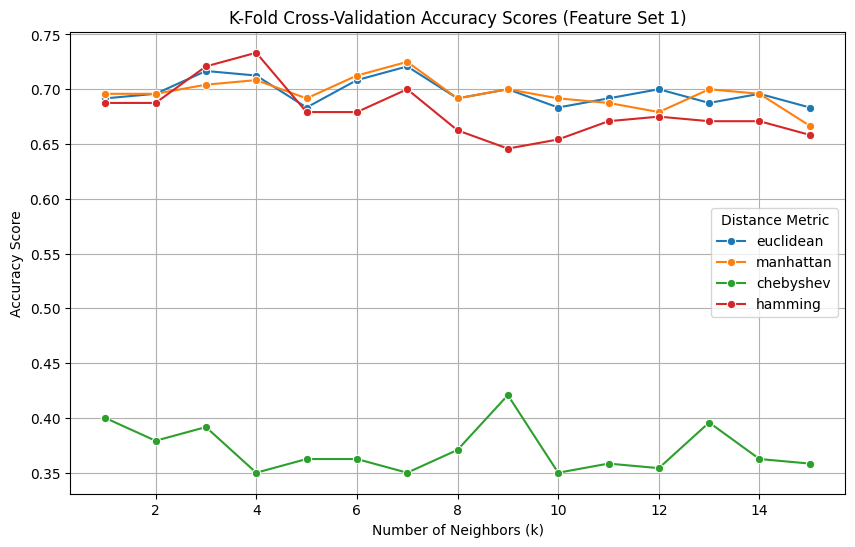

In [27]:
# Prepare data for visualization
results_df_list = []

# Collect results into a DataFrame-compatible format
for (k,d), metrics in all_metrics.items():
    results_df_list.append({'k': k,
                             'distance_metric': d,
                             'accuracy': metrics['accuracy']})

results_df = pd.DataFrame(results_df_list)

# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='k', y='accuracy', hue='distance_metric', data=results_df, marker='o')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Accuracy Scores (Feature Set 1)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

In [39]:
knn010 = KNNClassifier(k_neighbors=4, distance_metric='hamming')

In [40]:
knn010.fit(X_train_010, y_train_010)

Training time: 0.0000 seconds


In [41]:
y_pred010 = knn010.predict(X_test_010)

Prediction time: 0.1038 seconds


In [42]:
metrics010 = knn010.metrics(y_pred010, y_test_010)

In [ ]:
metrics010

{0: {'precision': 0.7894736842105263,
  'recall': 0.75,
  'f1_score': 0.7692307692307692},
 1: {'precision': 0.6875, 'recall': 0.5, 'f1_score': 0.5789473684210527},
 2: {'precision': 0.56,
  'recall': 0.7777777777777778,
  'f1_score': 0.6511627906976745},
 'accuracy': 0.7777777777777778,
 'macro_avg': {'precision': 0.6789912280701754,
  'recall': 0.6759259259259259,
  'f1_score': 0.6664469761164987}}

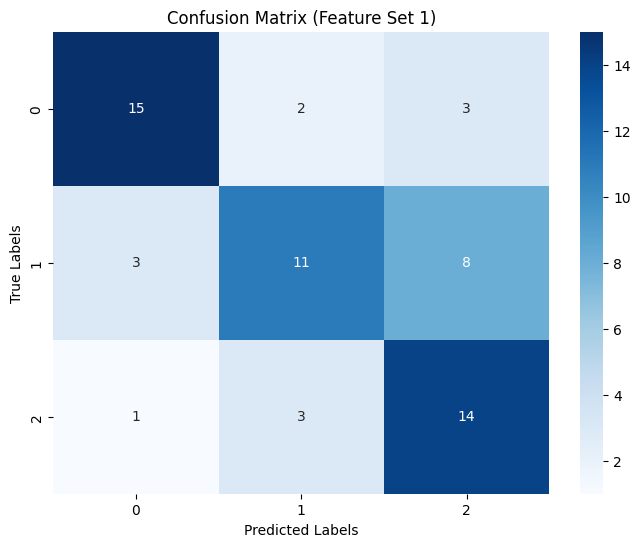

In [43]:
# Calculate confusion matrix
cm010 = confusion_matrix(y_test_010, y_pred010)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm010, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test_010), yticklabels=np.unique(y_test_010))

# Add titles and labels
plt.title('Confusion Matrix (Feature Set 1)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Feature Set 2

In [44]:
folds = cross_validation_split(X_train_028, y_train_028)
KFoldCV = KFoldCrossValidation([i for i in range(1, 16)],
                                ['euclidean', 'manhattan', 'chebyshev', 'hamming'],
                                'accuracy',
                                folds)
all_metrics, best_model_key = KFoldCV.calculate_metrics()

Training time: 0.0000 seconds
Prediction time: 0.1856 seconds
Training time: 0.0000 seconds
Prediction time: 0.1762 seconds
Training time: 0.0000 seconds
Prediction time: 0.1721 seconds
Training time: 0.0000 seconds
Prediction time: 0.1625 seconds
Training time: 0.0000 seconds
Prediction time: 0.1664 seconds
Training time: 0.0000 seconds
Prediction time: 0.1344 seconds
Training time: 0.0000 seconds


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Prediction time: 0.1427 seconds
Training time: 0.0000 seconds
Prediction time: 0.1399 seconds
Training time: 0.0000 seconds
Prediction time: 0.1411 seconds
Training time: 0.0000 seconds
Prediction time: 0.1315 seconds
Training time: 0.0000 seconds
Prediction time: 0.1469 seconds
Training time: 0.0000 seconds
Prediction time: 0.1434 seconds
Training time: 0.0000 seconds
Prediction time: 0.1439 seconds
Training time: 0.0000 seconds
Prediction time: 0.1413 seconds
Training time: 0.0000 seconds
Prediction time: 0.1430 seconds
Training time: 0.0000 seconds
Prediction time: 0.1221 seconds
Training time: 0.0000 seconds
Prediction time: 0.1256 seconds
Training time: 0.0000 seconds
Prediction time: 0.1240 seconds
Training time: 0.0000 seconds
Prediction time: 0.1237 seconds
Training time: 0.0000 seconds
Prediction time: 0.1198 seconds
Training time: 0.0000 seconds
Prediction time: 0.1719 seconds
Training time: 0.0000 seconds
Prediction time: 0.1713 seconds
Training time: 0.0000 seconds
Predicti

In [45]:
best_model_key

((10, 'euclidean'),
 {0: nan, 1: nan, 2: nan, 'accuracy': 0.7916666666666667, 'macro_avg': nan})

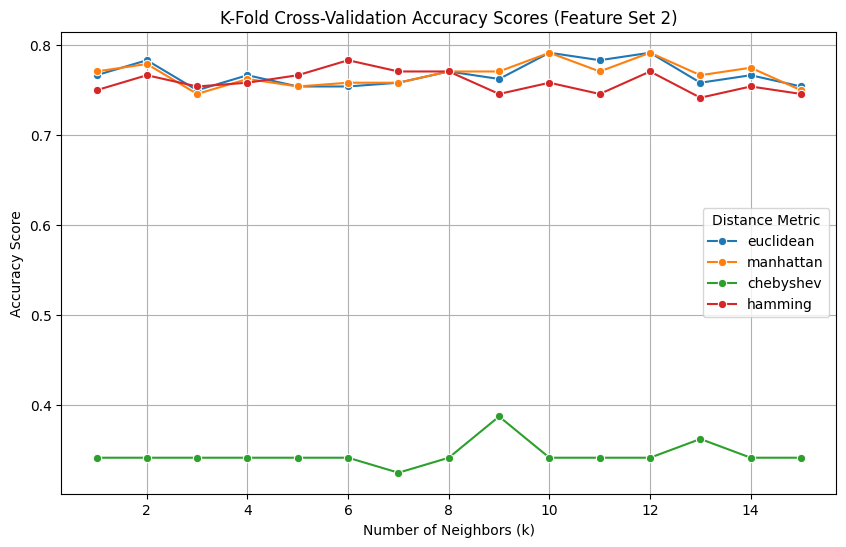

In [46]:
# Prepare data for visualization
results_df_list = []

# Collect results into a DataFrame-compatible format
for (k,d), metrics in all_metrics.items():
    results_df_list.append({'k': k,
                             'distance_metric': d,
                             'accuracy': metrics['accuracy']})

results_df = pd.DataFrame(results_df_list)

# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='k', y='accuracy', hue='distance_metric', data=results_df, marker='o')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Accuracy Scores (Feature Set 2)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

In [47]:
knn028 = KNNClassifier(k_neighbors=10, distance_metric='euclidean')

In [48]:
knn028.fit(X_train_028, y_train_028)

Training time: 0.0000 seconds


In [49]:
y_pred028 = knn028.predict(X_test_028)

Prediction time: 0.1749 seconds


In [50]:
metrics028 = knn028.metrics(y_pred028, y_test_028)

In [51]:
metrics028

{0: {'precision': 0.76, 'recall': 0.95, 'f1_score': 0.8444444444444444},
 1: {'precision': 0.9333333333333333,
  'recall': 0.6363636363636364,
  'f1_score': 0.7567567567567568},
 2: {'precision': 0.85,
  'recall': 0.9444444444444444,
  'f1_score': 0.8947368421052632},
 'accuracy': 0.8333333333333334,
 'macro_avg': {'precision': 0.8477777777777779,
  'recall': 0.8436026936026936,
  'f1_score': 0.8319793477688214}}

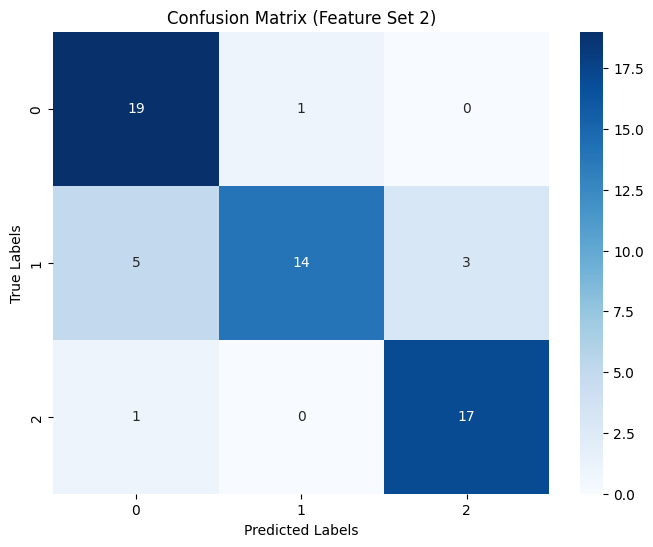

In [52]:
# Calculate confusion matrix
cm028 = confusion_matrix(y_test_028, y_pred028)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm028, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test_028), yticklabels=np.unique(y_test_028))

# Add titles and labels
plt.title('Confusion Matrix (Feature Set 2)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Feature Set 3

In [53]:
folds = cross_validation_split(X_train_064, y_train_064)
KFoldCV = KFoldCrossValidation([i for i in range(1, 16)],
                                ['euclidean', 'manhattan', 'chebyshev', 'hamming'],
                                'accuracy',
                                folds)
all_metrics, best_model_key = KFoldCV.calculate_metrics()

Training time: 0.0000 seconds
Prediction time: 0.2539 seconds
Training time: 0.0000 seconds
Prediction time: 0.2540 seconds
Training time: 0.0000 seconds
Prediction time: 0.2474 seconds
Training time: 0.0000 seconds
Prediction time: 0.2507 seconds
Training time: 0.0000 seconds
Prediction time: 0.2457 seconds
Training time: 0.0000 seconds


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Prediction time: 0.2245 seconds
Training time: 0.0000 seconds
Prediction time: 0.2227 seconds
Training time: 0.0000 seconds
Prediction time: 0.2256 seconds
Training time: 0.0000 seconds
Prediction time: 0.2205 seconds
Training time: 0.0000 seconds
Prediction time: 0.2128 seconds
Training time: 0.0000 seconds
Prediction time: 0.2358 seconds
Training time: 0.0000 seconds
Prediction time: 0.2274 seconds
Training time: 0.0000 seconds
Prediction time: 0.2214 seconds
Training time: 0.0000 seconds
Prediction time: 0.2097 seconds
Training time: 0.0000 seconds
Prediction time: 0.2201 seconds
Training time: 0.0000 seconds
Prediction time: 0.1877 seconds
Training time: 0.0000 seconds
Prediction time: 0.1864 seconds
Training time: 0.0000 seconds
Prediction time: 0.1903 seconds
Training time: 0.0000 seconds
Prediction time: 0.1952 seconds
Training time: 0.0000 seconds
Prediction time: 0.2093 seconds
Training time: 0.0000 seconds
Prediction time: 0.2568 seconds
Training time: 0.0000 seconds
Predicti

In [54]:
best_model_key

((4, 'euclidean'),
 {0: nan, 1: nan, 2: nan, 'accuracy': 0.825, 'macro_avg': nan})

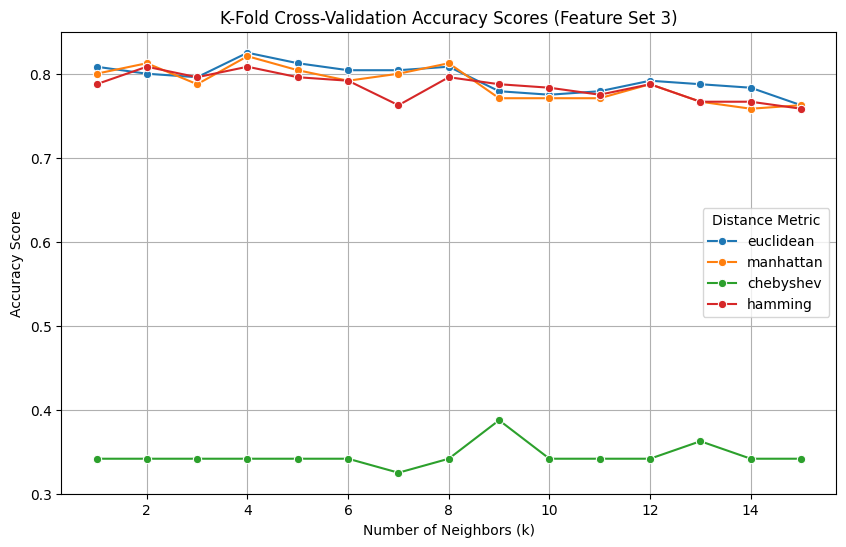

In [55]:
# Prepare data for visualization
results_df_list = []

# Collect results into a DataFrame-compatible format
for (k,d), metrics in all_metrics.items():
    results_df_list.append({'k': k,
                             'distance_metric': d,
                             'accuracy': metrics['accuracy']})

results_df = pd.DataFrame(results_df_list)

# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='k', y='accuracy', hue='distance_metric', data=results_df, marker='o')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Accuracy Scores (Feature Set 3)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

In [57]:
knn064 = KNNClassifier(k_neighbors=4, distance_metric='euclidean')

In [58]:
knn064.fit(X_train_064, y_train_064)

Training time: 0.0000 seconds


In [59]:
y_pred064 = knn064.predict(X_test_064)

Prediction time: 0.4445 seconds


In [60]:
metrics064 = knn064.metrics(y_pred064, y_test_064)

In [61]:
metrics064

{0: {'precision': 0.75, 'recall': 0.9, 'f1_score': 0.8181818181818182},
 1: {'precision': 0.8235294117647058,
  'recall': 0.6363636363636364,
  'f1_score': 0.717948717948718},
 2: {'precision': 0.8421052631578947,
  'recall': 0.8888888888888888,
  'f1_score': 0.8648648648648649},
 'accuracy': 0.8,
 'macro_avg': {'precision': 0.8052115583075334,
  'recall': 0.8084175084175085,
  'f1_score': 0.8003318003318004}}

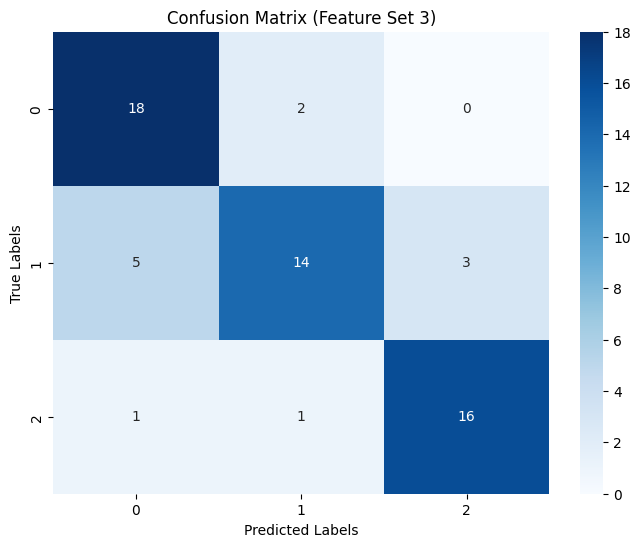

In [62]:
# Calculate confusion matrix
cm064 = confusion_matrix(y_test_064, y_pred064)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm064, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test_064), yticklabels=np.unique(y_test_064))

# Add titles and labels
plt.title('Confusion Matrix (Feature Set 3)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Feature Set 4

In [63]:
folds = cross_validation_split(X_train_110, y_train_110)
KFoldCV = KFoldCrossValidation([i for i in range(1, 16)],
                                ['euclidean', 'manhattan', 'chebyshev', 'hamming'],
                                'accuracy',
                                folds)
all_metrics, best_model_key = KFoldCV.calculate_metrics()

Training time: 0.0000 seconds
Prediction time: 0.1286 seconds
Training time: 0.0000 seconds
Prediction time: 0.1332 seconds
Training time: 0.0000 seconds
Prediction time: 0.1280 seconds
Training time: 0.0000 seconds
Prediction time: 0.1244 seconds
Training time: 0.0000 seconds
Prediction time: 0.1281 seconds
Training time: 0.0000 seconds


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Prediction time: 0.1084 seconds
Training time: 0.0000 seconds
Prediction time: 0.1129 seconds
Training time: 0.0000 seconds
Prediction time: 0.1075 seconds
Training time: 0.0000 seconds
Prediction time: 0.1060 seconds
Training time: 0.0000 seconds
Prediction time: 0.1067 seconds
Training time: 0.0000 seconds
Prediction time: 0.1132 seconds
Training time: 0.0000 seconds
Prediction time: 0.1168 seconds
Training time: 0.0000 seconds
Prediction time: 0.1138 seconds
Training time: 0.0000 seconds
Prediction time: 0.1150 seconds
Training time: 0.0000 seconds
Prediction time: 0.1094 seconds
Training time: 0.0000 seconds
Prediction time: 0.0944 seconds
Training time: 0.0000 seconds
Prediction time: 0.0963 seconds
Training time: 0.0000 seconds
Prediction time: 0.0985 seconds
Training time: 0.0000 seconds
Prediction time: 0.0917 seconds
Training time: 0.0000 seconds
Prediction time: 0.0991 seconds
Training time: 0.0000 seconds
Prediction time: 0.1263 seconds
Training time: 0.0000 seconds
Predicti

In [64]:
best_model_key

((1, 'euclidean'),
 {0: nan, 1: nan, 2: nan, 'accuracy': 0.9916666666666666, 'macro_avg': nan})

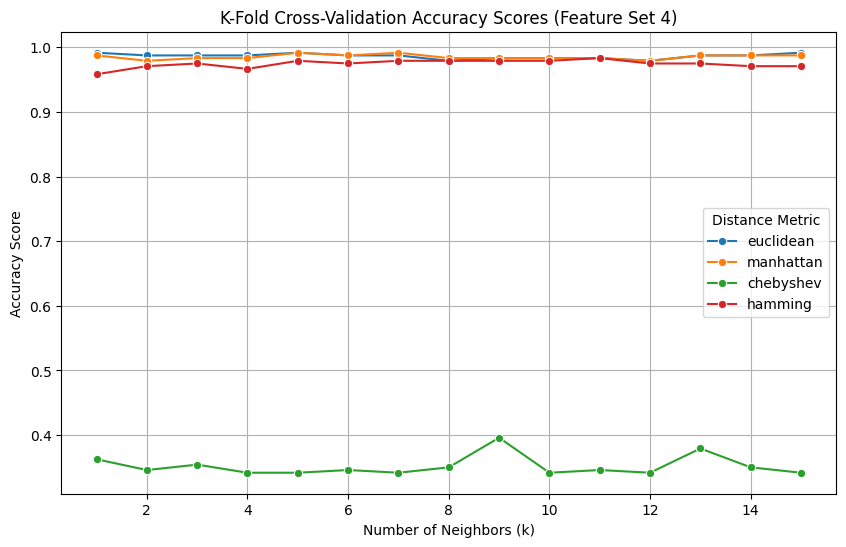

In [65]:
# Prepare data for visualization
results_df_list = []

# Collect results into a DataFrame-compatible format
for (k,d), metrics in all_metrics.items():
    results_df_list.append({'k': k,
                             'distance_metric': d,
                             'accuracy': metrics['accuracy']})

results_df = pd.DataFrame(results_df_list)

# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='k', y='accuracy', hue='distance_metric', data=results_df, marker='o')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Accuracy Scores (Feature Set 4)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

In [66]:
knn110 = KNNClassifier(k_neighbors=1, distance_metric='euclidean')

In [67]:
knn110.fit(X_train_110, y_train_110)

Training time: 0.0000 seconds


In [68]:
y_pred110 = knn110.predict(X_test_110)

Prediction time: 0.1287 seconds


In [69]:
metrics110 = knn110.metrics(y_pred110, y_test_110)

In [70]:
metrics110

{0: {'precision': 1.0, 'recall': 0.95, 'f1_score': 0.9743589743589743},
 1: {'precision': 0.9545454545454546,
  'recall': 0.9545454545454546,
  'f1_score': 0.9545454545454546},
 2: {'precision': 0.9473684210526315,
  'recall': 1.0,
  'f1_score': 0.972972972972973},
 'accuracy': 0.9666666666666667,
 'macro_avg': {'precision': 0.967304625199362,
  'recall': 0.9681818181818181,
  'f1_score': 0.9672924672924674}}

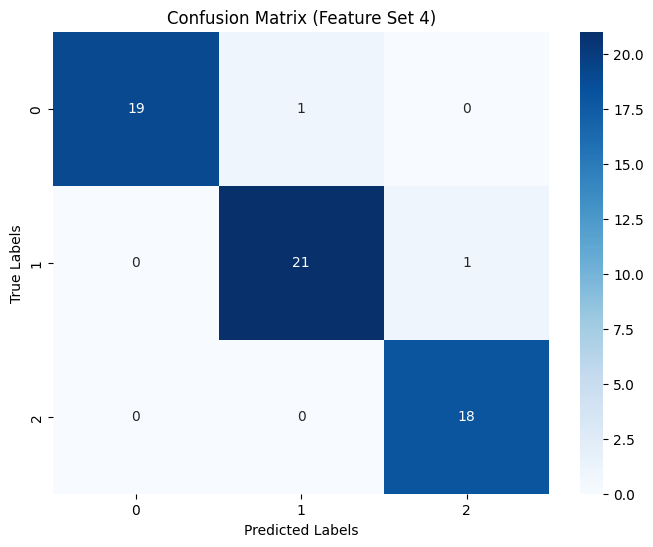

In [71]:
# Calculate confusion matrix
cm110 = confusion_matrix(y_test_110, y_pred110)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm110, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test_110), yticklabels=np.unique(y_test_110))

# Add titles and labels
plt.title('Confusion Matrix (Feature Set 4)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Feature 5

In [72]:
folds = cross_validation_split(X_train_128, y_train_128)
KFoldCV = KFoldCrossValidation([i for i in range(1, 16)],
                                ['euclidean', 'manhattan', 'chebyshev', 'hamming'],
                                'accuracy',
                                folds)
all_metrics, best_model_key = KFoldCV.calculate_metrics()

Training time: 0.0000 seconds
Prediction time: 0.1759 seconds
Training time: 0.0000 seconds
Prediction time: 0.1659 seconds
Training time: 0.0000 seconds
Prediction time: 0.1842 seconds
Training time: 0.0000 seconds
Prediction time: 0.1808 seconds
Training time: 0.0000 seconds
Prediction time: 0.1771 seconds
Training time: 0.0000 seconds


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Prediction time: 0.1424 seconds
Training time: 0.0000 seconds
Prediction time: 0.1406 seconds
Training time: 0.0000 seconds
Prediction time: 0.1428 seconds
Training time: 0.0000 seconds
Prediction time: 0.1466 seconds
Training time: 0.0000 seconds
Prediction time: 0.1455 seconds
Training time: 0.0000 seconds
Prediction time: 0.1590 seconds
Training time: 0.0000 seconds
Prediction time: 0.1541 seconds
Training time: 0.0000 seconds
Prediction time: 0.1589 seconds
Training time: 0.0000 seconds
Prediction time: 0.1592 seconds
Training time: 0.0000 seconds
Prediction time: 0.1580 seconds
Training time: 0.0000 seconds
Prediction time: 0.1449 seconds
Training time: 0.0000 seconds
Prediction time: 0.1467 seconds
Training time: 0.0000 seconds
Prediction time: 0.1304 seconds
Training time: 0.0000 seconds
Prediction time: 0.1354 seconds
Training time: 0.0000 seconds
Prediction time: 0.1359 seconds
Training time: 0.0000 seconds
Prediction time: 0.1753 seconds
Training time: 0.0000 seconds
Predicti

In [73]:
best_model_key

((3, 'hamming'),
 {0: nan, 1: nan, 2: nan, 'accuracy': 0.9958333333333332, 'macro_avg': nan})

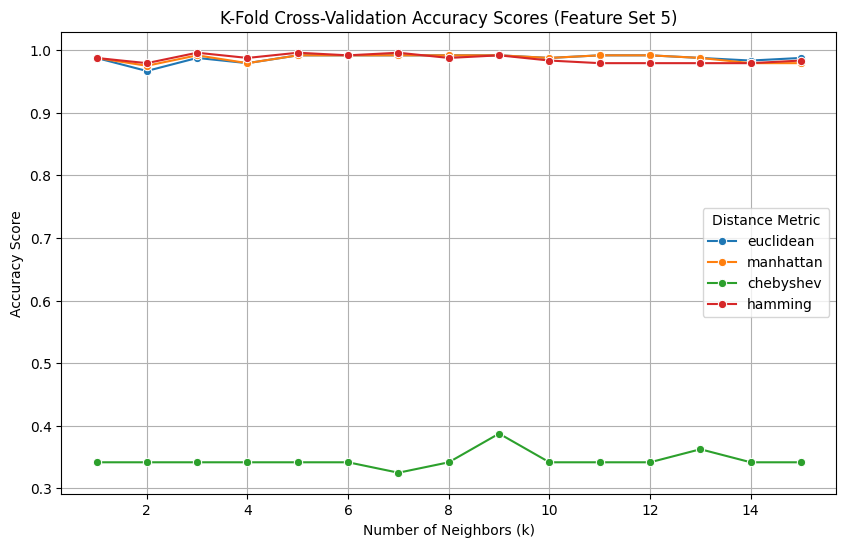

In [74]:
# Prepare data for visualization
results_df_list = []

# Collect results into a DataFrame-compatible format
for (k,d), metrics in all_metrics.items():
    results_df_list.append({'k': k,
                             'distance_metric': d,
                             'accuracy': metrics['accuracy']})

results_df = pd.DataFrame(results_df_list)

# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='k', y='accuracy', hue='distance_metric', data=results_df, marker='o')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Accuracy Scores (Feature Set 5)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

In [75]:
knn128 = KNNClassifier(k_neighbors=3, distance_metric='hamming')

In [76]:
knn128.fit(X_train_128, y_train_128)

Training time: 0.0000 seconds


In [77]:
y_pred128 = knn128.predict(X_test_128)

Prediction time: 0.2273 seconds


In [78]:
metrics128 = knn128.metrics(y_pred128, y_test_128)

In [79]:
metrics128

{0: {'precision': 1.0, 'recall': 0.95, 'f1_score': 0.9743589743589743},
 1: {'precision': 0.9565217391304348,
  'recall': 1.0,
  'f1_score': 0.9777777777777777},
 2: {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0},
 'accuracy': 0.9833333333333333,
 'macro_avg': {'precision': 0.9855072463768115,
  'recall': 0.9833333333333334,
  'f1_score': 0.9840455840455841}}

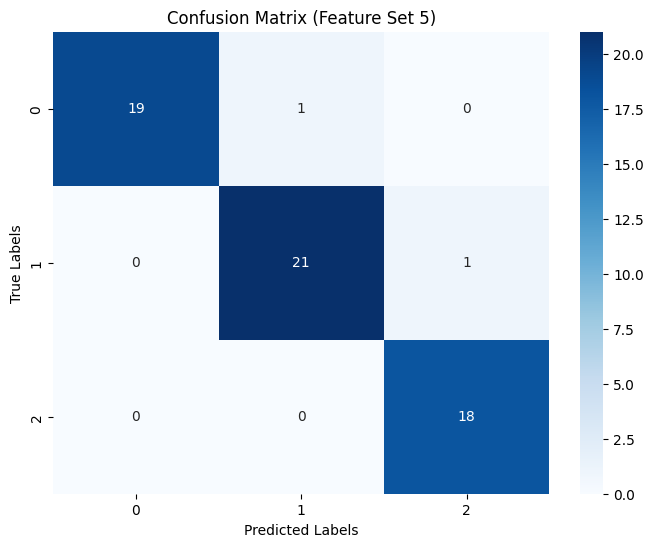

In [80]:
# Calculate confusion matrix
cm128 = confusion_matrix(y_test_128, y_pred128)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm110, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test_128), yticklabels=np.unique(y_test_128))

# Add titles and labels
plt.title('Confusion Matrix (Feature Set 5)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Feature 6

In [81]:
folds = cross_validation_split(X_train_164, y_train_164)
KFoldCV = KFoldCrossValidation([i for i in range(1, 16)],
                                ['euclidean', 'manhattan', 'chebyshev', 'hamming'],
                                'accuracy',
                                folds)
all_metrics, best_model_key = KFoldCV.calculate_metrics()

Training time: 0.0000 seconds
Prediction time: 0.2518 seconds
Training time: 0.0000 seconds
Prediction time: 0.2422 seconds
Training time: 0.0000 seconds
Prediction time: 0.2478 seconds
Training time: 0.0000 seconds
Prediction time: 0.2582 seconds
Training time: 0.0000 seconds
Prediction time: 0.2584 seconds
Training time: 0.0000 seconds


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Prediction time: 0.2253 seconds
Training time: 0.0000 seconds
Prediction time: 0.2185 seconds
Training time: 0.0000 seconds
Prediction time: 0.2067 seconds
Training time: 0.0000 seconds
Prediction time: 0.2188 seconds
Training time: 0.0000 seconds
Prediction time: 0.2153 seconds
Training time: 0.0000 seconds
Prediction time: 0.2266 seconds
Training time: 0.0000 seconds
Prediction time: 0.2293 seconds
Training time: 0.0000 seconds
Prediction time: 0.2349 seconds
Training time: 0.0000 seconds
Prediction time: 0.2398 seconds
Training time: 0.0000 seconds
Prediction time: 0.2284 seconds
Training time: 0.0000 seconds
Prediction time: 0.1979 seconds
Training time: 0.0000 seconds
Prediction time: 0.2035 seconds
Training time: 0.0000 seconds
Prediction time: 0.1953 seconds
Training time: 0.0000 seconds
Prediction time: 0.1982 seconds
Training time: 0.0000 seconds
Prediction time: 0.1917 seconds
Training time: 0.0000 seconds
Prediction time: 0.2552 seconds
Training time: 0.0000 seconds
Predicti

In [82]:
best_model_key

((3, 'hamming'), {0: nan, 1: nan, 2: nan, 'accuracy': 1.0, 'macro_avg': nan})

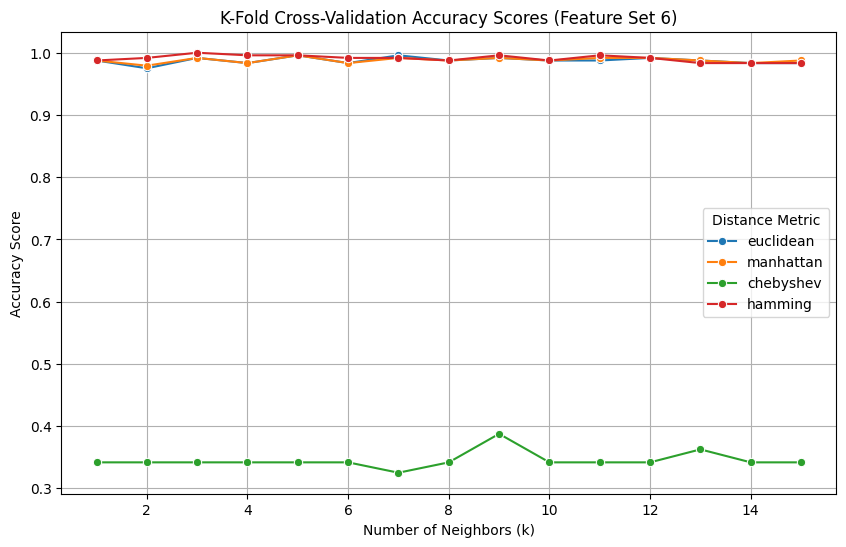

In [83]:
# Prepare data for visualization
results_df_list = []

# Collect results into a DataFrame-compatible format
for (k,d), metrics in all_metrics.items():
    results_df_list.append({'k': k,
                             'distance_metric': d,
                             'accuracy': metrics['accuracy']})

results_df = pd.DataFrame(results_df_list)

# Visualization using seaborn and matplotlib
plt.figure(figsize=(10, 6))

sns.lineplot(x='k', y='accuracy', hue='distance_metric', data=results_df, marker='o')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Accuracy Scores (Feature Set 6)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

In [84]:
knn164 = KNNClassifier(k_neighbors=3, distance_metric='hamming')

In [85]:
knn164.fit(X_train_164, y_train_164)

Training time: 0.0000 seconds


In [86]:
y_pred164 = knn164.predict(X_test_164)

Prediction time: 0.6201 seconds


In [87]:
metrics164 = knn164.metrics(y_pred164, y_test_164)

In [88]:
metrics164

{0: {'precision': 1.0, 'recall': 0.95, 'f1_score': 0.9743589743589743},
 1: {'precision': 0.9565217391304348,
  'recall': 1.0,
  'f1_score': 0.9777777777777777},
 2: {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0},
 'accuracy': 0.9833333333333333,
 'macro_avg': {'precision': 0.9855072463768115,
  'recall': 0.9833333333333334,
  'f1_score': 0.9840455840455841}}

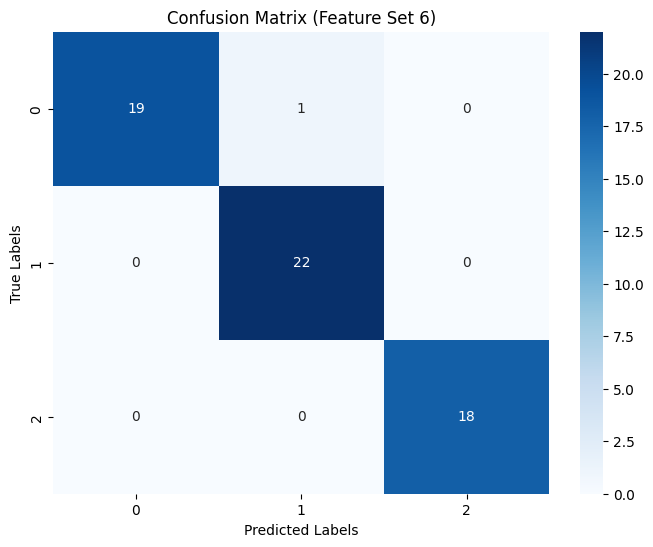

In [89]:
# Calculate confusion matrix
cm164 = confusion_matrix(y_test_164, y_pred164)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm164, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test_164), yticklabels=np.unique(y_test_164))

# Add titles and labels
plt.title('Confusion Matrix (Feature Set 6)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Built-in Library

## Feature Set 1: No Cropping + 10x10 pixelated images

In [118]:
knn1 = KNeighborsClassifier()
n_neighbors = list(range(1, 16))
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn1, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_010, y_train_010)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

In [119]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

Best accuracy: 0.7166666666666668


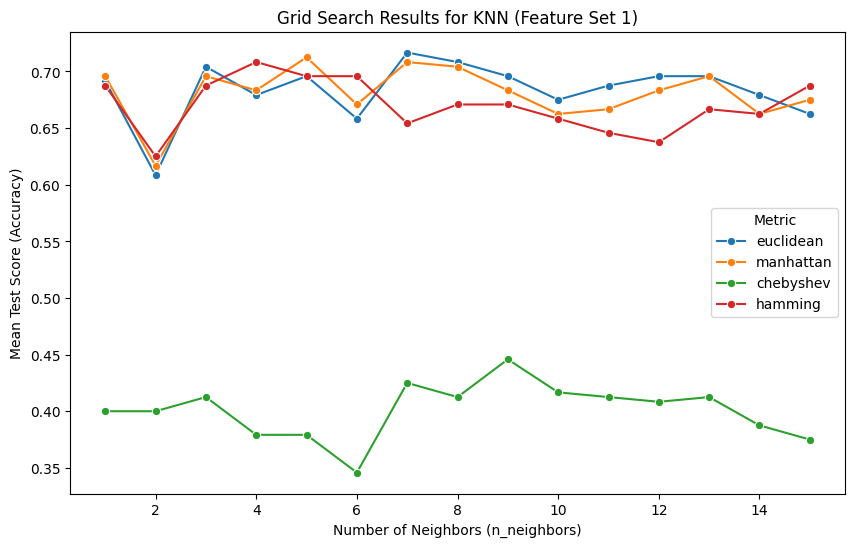

In [120]:
print(f"Best accuracy: {grid_search.best_score_}")

# Extract results into a DataFrame for easier plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy scores for different n_neighbors values
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN (Feature Set 1)')
plt.legend(title='Metric')
plt.show()

In [93]:
knn1_test = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn1_test.fit(X_train_010, y_train_010)

y_pred_test = knn1_test.predict(X_test_010)

In [94]:
accuracy = accuracy_score(y_test_010, y_pred_test)
precision = precision_score(y_test_010, y_pred_test, average='macro')
recall = recall_score(y_test_010, y_pred_test, average='macro')
f1 = f1_score(y_test_010, y_pred_test, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7166666666666667
Precision: 0.715771526001705
Recall: 0.7191919191919193
F1 Score: 0.7118183054535564


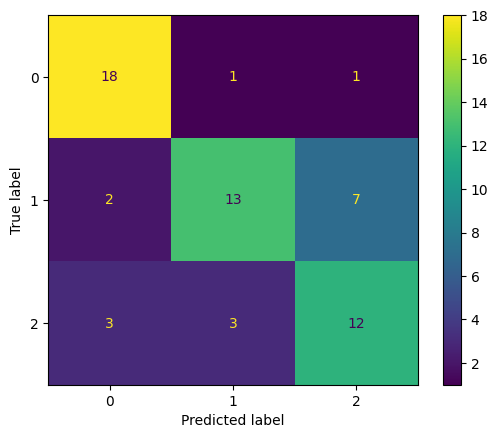

In [95]:
cm1 = confusion_matrix(y_test_010, y_pred_test)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=knn1_test.classes_)
disp1.plot()
plt.show()

## Feature Set 2: No Cropping + 28x28 pixelated images

In [121]:
knn2 = KNeighborsClassifier()
n_neighbors = list(range(1, 16))
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn2, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_028, y_train_028)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

Best accuracy: 0.7875


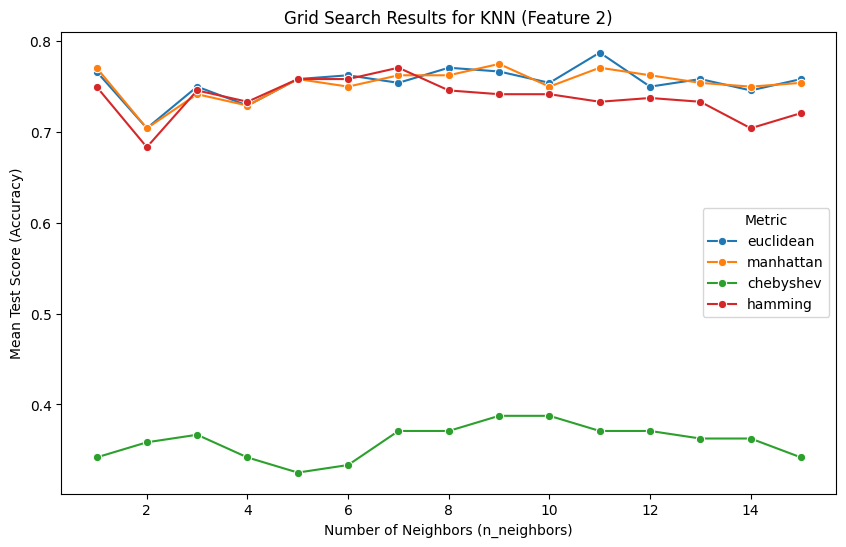

In [123]:
print(f"Best accuracy: {grid_search.best_score_}")

# Extract results into a DataFrame for easier plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy scores for different n_neighbors values
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN (Feature 2)')
plt.legend(title='Metric')
plt.show()

In [98]:
knn2_test = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn2_test.fit(X_train_028, y_train_028)

y_pred_test28 = knn2_test.predict(X_test_028)

In [99]:
accuracy = accuracy_score(y_test_028, y_pred_test28)
precision = precision_score(y_test_028, y_pred_test28, average='macro')
recall = recall_score(y_test_028, y_pred_test28, average='macro')
f1 = f1_score(y_test_028, y_pred_test28, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8166666666666667
Precision: 0.8423373247934651
Recall: 0.8284511784511785
F1 Score: 0.8165505931463378


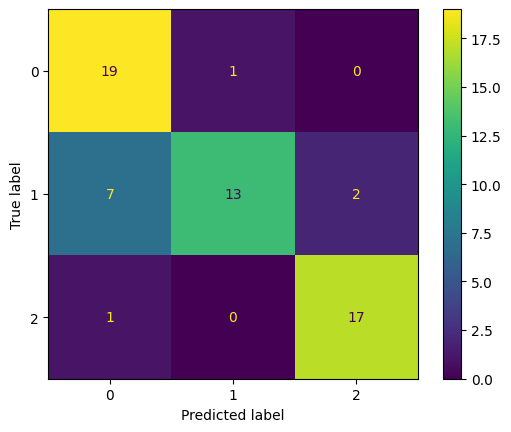

In [100]:
cm2 = confusion_matrix(y_test_028, y_pred_test28)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=knn2_test.classes_)
disp2.plot()
plt.show()

## Feature Set 3: No Cropping + 64x64 pixelated images

In [124]:
knn3 = KNeighborsClassifier()
n_neighbors = list(range(1, 16))
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn3, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_064, y_train_064)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

Best accuracy: 0.8208333333333334


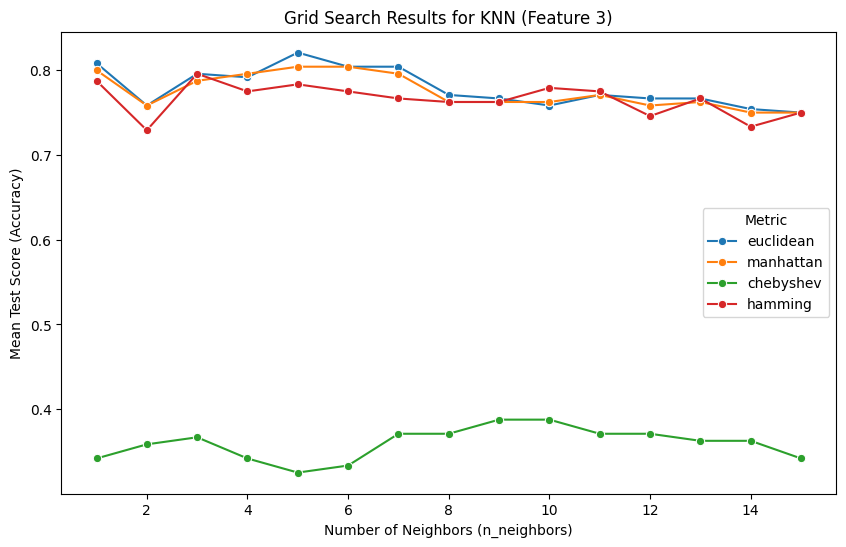

In [125]:
print(f"Best accuracy: {grid_search.best_score_}")

# Extract results into a DataFrame for easier plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy scores for different n_neighbors values
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN (Feature 3)')
plt.legend(title='Metric')
plt.show()

In [103]:
knn3_test = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn3_test.fit(X_train_064, y_train_064)

y_pred_test64 = knn3_test.predict(X_test_064)
accuracy = accuracy_score(y_test_064, y_pred_test64)
precision = precision_score(y_test_064, y_pred_test64, average='macro')
recall = recall_score(y_test_064, y_pred_test64, average='macro')
f1 = f1_score(y_test_064, y_pred_test64, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8
Precision: 0.8156578947368421
Recall: 0.805050505050505
F1 Score: 0.8046867527498804


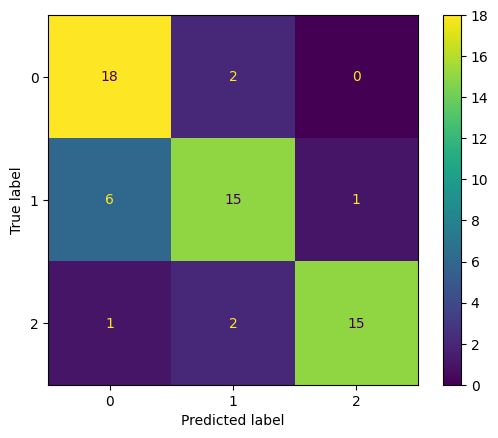

In [104]:
cm3 = confusion_matrix(y_test_064, y_pred_test64)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=knn3_test.classes_)
disp3.plot()
plt.show()

## Feature Set 4: Cropping + 10x10 pixelated images

In [126]:
knn4 = KNeighborsClassifier()
n_neighbors = list(range(1, 16))
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn4, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_110, y_train_110)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

Best accuracy: 0.9916666666666666


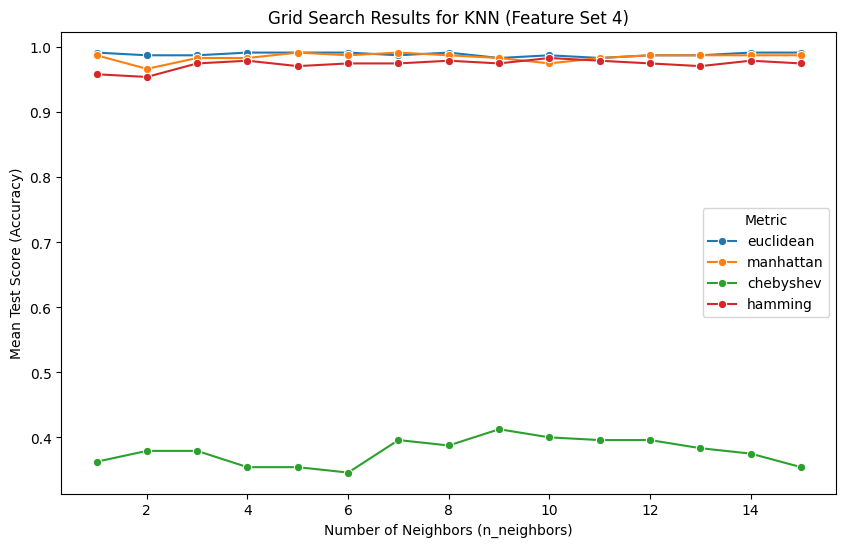

In [127]:
print(f"Best accuracy: {grid_search.best_score_}")

# Extract results into a DataFrame for easier plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy scores for different n_neighbors values
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN (Feature Set 4)')
plt.legend(title='Metric')
plt.show()

In [107]:
knn4_test = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn4_test.fit(X_train_110, y_train_110)

y_pred4 = knn4_test.predict(X_test_110)
accuracy = accuracy_score(y_test_110, y_pred4)
precision = precision_score(y_test_110, y_pred4, average='macro')
recall = recall_score(y_test_110, y_pred4, average='macro')
f1 = f1_score(y_test_110, y_pred4, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.967304625199362
Recall: 0.9681818181818181
F1 Score: 0.9672924672924674


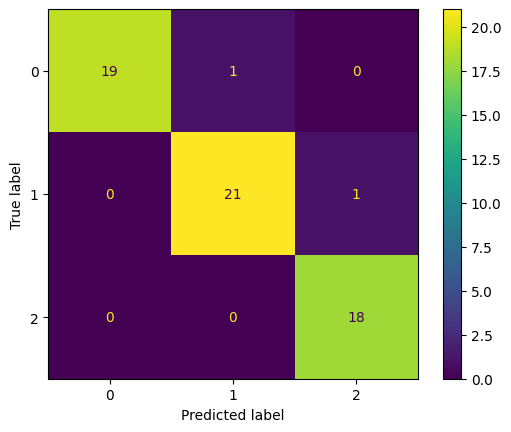

In [108]:
cm4 = confusion_matrix(y_test_110, y_pred4)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=knn4_test.classes_)
disp4.plot()
plt.show()

## Feature Set 5: Cropping + 28x28 pixelated images

In [128]:
knn5 = KNeighborsClassifier()
n_neighbors = list(range(1, 16))
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn5, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_128, y_train_128)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             scoring='accuracy')

Best accuracy: 1.0


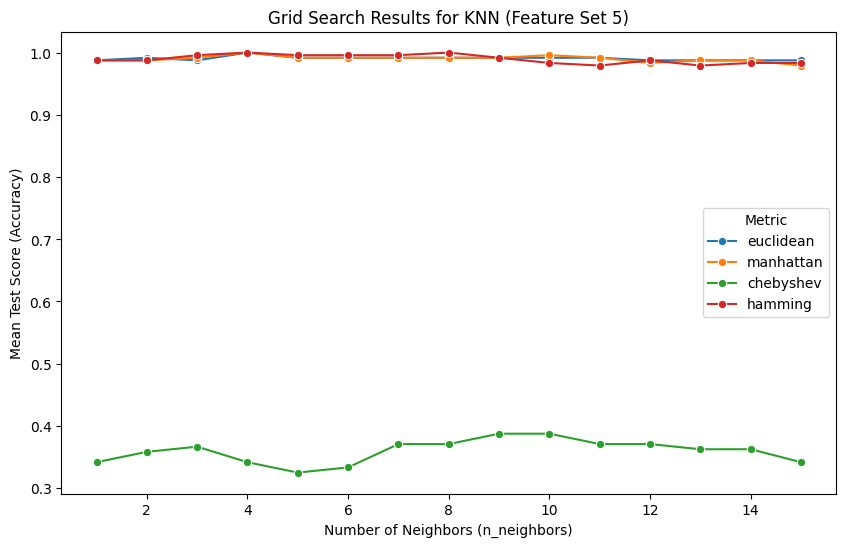

In [129]:
print(f"Best accuracy: {grid_search.best_score_}")

# Extract results into a DataFrame for easier plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy scores for different n_neighbors values
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN (Feature Set 5)')
plt.legend(title='Metric')
plt.show()

In [111]:
knn5_test = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn5_test.fit(X_train_128, y_train_128)

y_pred5 = knn5_test.predict(X_test_128)
accuracy = accuracy_score(y_test_128, y_pred5)
precision = precision_score(y_test_128, y_pred5, average='macro')
recall = recall_score(y_test_128, y_pred5, average='macro')
f1 = f1_score(y_test_128, y_pred5, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9833333333333333
Precision: 0.9824561403508771
Recall: 0.9833333333333334
F1 Score: 0.9824439824439825


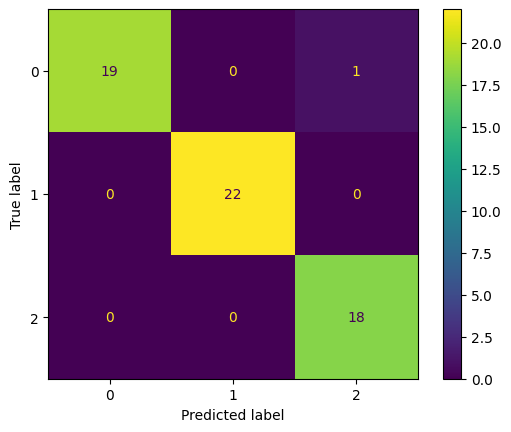

In [112]:
cm5 = confusion_matrix(y_test_128, y_pred5)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                              display_labels=knn5_test.classes_)
disp5.plot()
plt.show()

## Feature Set 6: Cropping + 64x64 pixelated images

In [113]:
knn6 = KNeighborsClassifier()
n_neighbors = list(range(1, 15))
param_grid = {
    'n_neighbors': n_neighbors,
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn6, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train_164, y_train_164)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'hamming'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

Best accuracy: 1.0


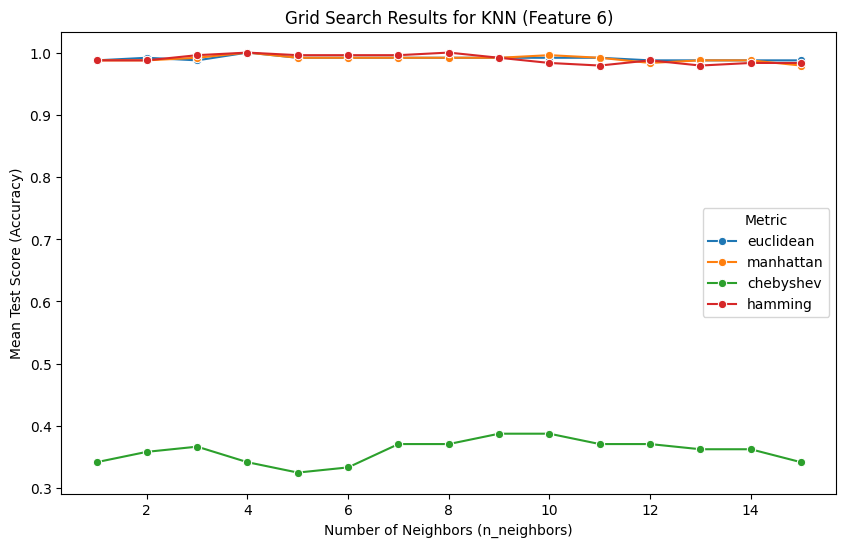

In [130]:
print(f"Best accuracy: {grid_search.best_score_}")

# Extract results into a DataFrame for easier plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy scores for different n_neighbors values
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', hue='param_metric', data=results, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Grid Search Results for KNN (Feature 6)')
plt.legend(title='Metric')
plt.show()

In [115]:
knn6_test = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn6_test.fit(X_train_164, y_train_164)

y_pred6 = knn6_test.predict(X_test_164)
accuracy = accuracy_score(y_test_164, y_pred6)
precision = precision_score(y_test_164, y_pred6, average='macro')
recall = recall_score(y_test_164, y_pred6, average='macro')
f1 = f1_score(y_test_164, y_pred6, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9833333333333333
Precision: 0.9855072463768115
Recall: 0.9833333333333334
F1 Score: 0.9840455840455841


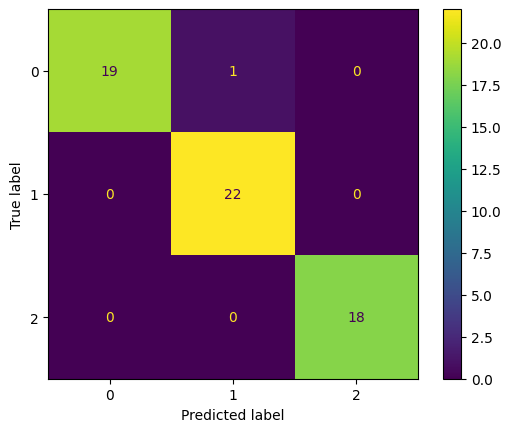

In [116]:
cm6 = confusion_matrix(y_test_164, y_pred6)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6,
                              display_labels=knn6_test.classes_)
disp6.plot()
plt.show()